In [15]:
from random_search import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns#
import math
from sklearn.metrics import log_loss
from sklearn.preprocessing import OneHotEncoder

## Load and prepare data

In [2]:
df = pd.read_csv('data/framingham.csv')
df = df.dropna()

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Train-test split

In [4]:
df_train = df.sample(frac=0.8)
df_valid = df.drop(df_train.index)

In [5]:
X_train = df_train[['male', 'age', 'education', 'currentSmoker',
                    'cigsPerDay', 'BPMeds', 'prevalentStroke', 
                    'prevalentHyp', 'diabetes', 'totChol', 
                    'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'
                   ]].to_numpy()
y_train = df_train['TenYearCHD'].to_numpy()


X_valid = df_valid[['male', 'age', 'education', 'currentSmoker',
                    'cigsPerDay', 'BPMeds', 'prevalentStroke', 
                    'prevalentHyp', 'diabetes', 'totChol', 
                    'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'
                   ]].to_numpy()
y_valid = df_valid['TenYearCHD'].to_numpy()

In [6]:
X_train = np.c_[np.ones((y_train.shape[0], 1)), X_train]
X_valid = np.c_[np.ones((y_valid.shape[0], 1)), X_valid]

In [7]:
X_train.shape

(2925, 16)

### Basic experiment

In [8]:
epochs = 30

In [9]:
w1, losses1, valid_losses1 = random_search(epochs, X_train, y_train, X_valid, y_valid, gamma=0.00001, m=0.0001, loss=log_loss)

loss_w = 0.6931471805599453
valid_loss = 0.6931471805599453
loss_w = 0.4470880783265781
valid_loss = 0.4602969262036522
loss_w = 0.4404077805746745
valid_loss = 0.4560959547555494


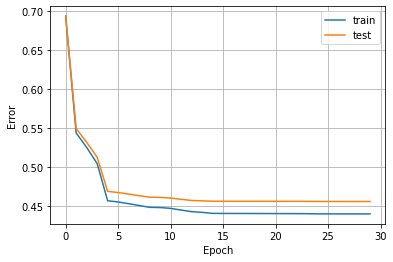

In [10]:
plt.plot(list(range(30)), losses1, label = 'train')
plt.plot(list(range(30)), valid_losses1, label = 'test')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.grid()
plt.legend()
#plt.savefig('figs/zo_classification')

### Parameter m - tuning

In [12]:
m_vals = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]

In [13]:
loss_list = []
valid_loss_list = []

for m in m_vals:
    print('m = {}'.format(m))
    w, losses, valid_losses = random_search(30, X_train, y_train, X_valid, y_valid, 1e-5, m, log_loss)
    loss_list.append(losses)
    valid_loss_list.append(valid_losses)
    print('-------------------------')

m = 0.1
loss_w = 0.6931471805599453
valid_loss = 0.6931471805599453
loss_w = 0.48019770428318287
valid_loss = 0.49982724043335613
loss_w = 0.8438316188248252
valid_loss = 0.8958726475665103
-------------------------
m = 0.01
loss_w = 0.6931471805599453
valid_loss = 0.6931471805599453
loss_w = 0.44605696965060265
valid_loss = 0.4598117026887954
loss_w = 0.5244889646511034
valid_loss = 0.5548512282811878
-------------------------
m = 0.001
loss_w = 0.6931471805599453
valid_loss = 0.6931471805599453
loss_w = 0.44977109876280036
valid_loss = 0.46244353183651027
loss_w = 0.4405378466269211
valid_loss = 0.45705180436180154
-------------------------
m = 0.0001
loss_w = 0.6931471805599453
valid_loss = 0.6931471805599453
loss_w = 0.4470880783265781
valid_loss = 0.4602969262036522
loss_w = 0.4404077805746745
valid_loss = 0.4560959547555494
-------------------------
m = 1e-05
loss_w = 0.6931471805599453
valid_loss = 0.6931471805599453
loss_w = 0.4467802509523647
valid_loss = 0.4600544501278984
lo

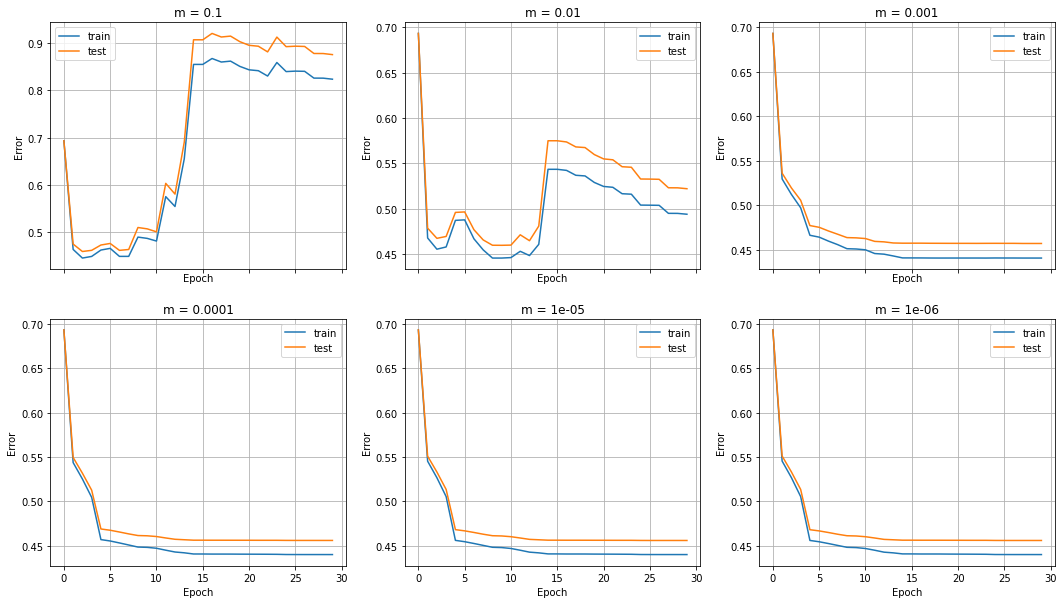

In [14]:
fig, axs = plt.subplots(2,3,sharey=False, sharex=True, figsize=(18,10))

for i in range(len(axs)):
    for j in range(len(axs[0])):
        n = i+j+2*i
        axs[i,j].plot(list(range(30)), loss_list[n], label = 'train')
        axs[i,j].plot(list(range(30)), valid_loss_list[n], label = 'test')
        axs[i,j].set_xlabel('Epoch')
        axs[i,j].set_ylabel('Error')
        axs[i,j].set_title('m = {}'.format(m_vals[n]))
        axs[i,j].grid()
        axs[i,j].legend()
        
#plt.savefig('figs/m_tuning')

Try more epochs with m=0.1:

In [28]:
w, losses, valid_losses = random_search(300, X_train, y_train, X_valid, y_valid, 1e-5, m_vals[0], log_loss)

loss_w = 0.6931471805599453
valid_loss = 0.6931471805599453
loss_w = 0.7207406691443804
valid_loss = 0.8475621609756108
loss_w = 0.9205544556416646
valid_loss = 1.0814961426234153
loss_w = 1.3325111096249926
valid_loss = 1.5643383169298253
loss_w = 1.3821407170342723
valid_loss = 1.6175020235152466
loss_w = 1.6578543633456662
valid_loss = 1.9430134630874707
loss_w = 1.9206199708083396
valid_loss = 2.255374182081914
loss_w = 2.2003425443131452
valid_loss = 2.581670771091419
loss_w = 2.2915115315261465
valid_loss = 2.6881567744061803
loss_w = 2.4762352149037326
valid_loss = 2.9034607425061547
loss_w = 2.5070361774493795
valid_loss = 2.9411712433023647
loss_w = 2.9472530212911487
valid_loss = 3.4597366612711586
loss_w = 2.9766918932479713
valid_loss = 3.4940259950906185
loss_w = 2.938191248328164
valid_loss = 3.4477604404248434
loss_w = 2.9481962778263693
valid_loss = 3.459521728056718
loss_w = 3.739712387853192
valid_loss = 4.401297163895091
loss_w = 4.069918630807145
valid_loss = 4.7893

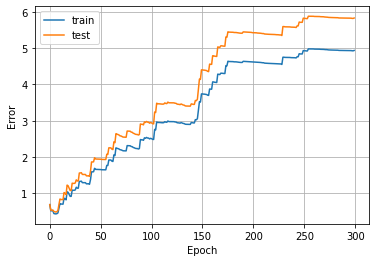

In [29]:
plt.plot(list(range(300)), losses, label = 'train')
plt.plot(list(range(300)), valid_losses, label = 'test')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.grid()
plt.legend()

Try more epochs with m=0.01:

In [26]:
w, losses, valid_losses = random_search(100, X_train, y_train, X_valid, y_valid, 1e-5, m_vals[1], log_loss)

loss_w = 0.6931471805599453
valid_loss = 0.6931471805599453
loss_w = 0.44259100385716904
valid_loss = 0.475035492110732
loss_w = 0.7613920361707213
valid_loss = 0.8986940159668813
loss_w = 0.6977089909607131
valid_loss = 0.8221703637622257
loss_w = 0.634942398848523
valid_loss = 0.7473216113249073
loss_w = 1.0024973334109177
valid_loss = 1.179288796512101
loss_w = 0.8358506875447074
valid_loss = 0.9821148186950251
loss_w = 0.6948344672898895
valid_loss = 0.8149106263527607
loss_w = 0.6654192379217089
valid_loss = 0.7791368221563314
loss_w = 0.6636909647100417
valid_loss = 0.7753744923098878


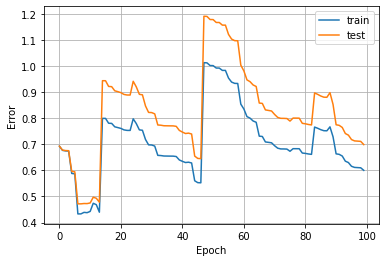

In [27]:
plt.plot(list(range(100)), losses, label = 'train')
plt.plot(list(range(100)), valid_losses, label = 'test')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.grid()
plt.legend()

In [32]:
w, losses, valid_losses = random_search(30, X_train, y_train, X_valid, y_valid, 1e-5, 1e-18, log_loss)

loss_w = 0.6931471805599453
valid_loss = 0.6931471805599453
loss_w = 0.5108435245794473
valid_loss = 0.5192591446301766
loss_w = 0.43999093519910615
valid_loss = 0.4575453929709873


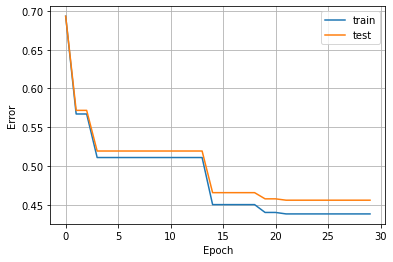

In [33]:
plt.plot(list(range(30)), losses, label = 'train')
plt.plot(list(range(30)), valid_losses, label = 'test')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.grid()
plt.legend()

In [36]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [37]:
model = SGDClassifier(loss = 'log', verbose=2, fit_intercept = True, learning_rate = 'constant', eta0 = 1e-5)#, max_iter=1000)

In [38]:
model.fit(X_train, y_train)

-- Epoch 1
Norm: 0.02, NNZs: 16, Bias: -0.000300, T: 2925, Avg. loss: 0.471650
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.04, NNZs: 16, Bias: -0.000575, T: 5850, Avg. loss: 0.458726
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.04, NNZs: 16, Bias: -0.000839, T: 8775, Avg. loss: 0.450465
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.05, NNZs: 16, Bias: -0.001081, T: 11700, Avg. loss: 0.454030
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.06, NNZs: 16, Bias: -0.001307, T: 14625, Avg. loss: 0.448681
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.06, NNZs: 16, Bias: -0.001548, T: 17550, Avg. loss: 0.447476
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.06, NNZs: 16, Bias: -0.001771, T: 20475, Avg. loss: 0.447285
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.07, NNZs: 16, Bias: -0.001972, T: 23400, Avg. loss: 0.448912
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.07, NNZs: 16, Bias: -0.002196, T: 26325, Avg. loss: 0.445526
Tot

SGDClassifier(eta0=1e-05, learning_rate='constant', loss='log', verbose=2)

In [39]:
w = model.coef_

In [42]:
pred = sigmoid(X_valid.dot(w.T))

In [43]:
log_loss(y_valid, pred)

0.4441309372471645

In [40]:
np.random.seed(0)

In [14]:
np.random.seed(0)
print(np.random.random())
print(np.random.random())
print(np.random.random())
print(np.random.random())

0.5488135039273248
0.7151893663724195
0.6027633760716439
0.5448831829968969
